Explore some period in the history of cinematography. For concreteness, I chose all movies that was released before 1950.

**goal 1**: According data in the dataset, plot changes from year to year:
* number of movies
* average rating of all movies in a year
* average popularity (total number of ratings for year / number of movies)

**goal 2**: Count number of movies of different genres.

**goal 3**: Select one genre (e.g. 'Documentary') and graph number of movies of this genre per year.

**goal 4**: Determine with what other genres the movies of the defined genre are adjacent.


The program should be created in flexible way, allowing easily change period and genre.

For project there were used data base MovieLens ml-25m from [grouplens.org](https://grouplens.org/datasets/movielens/).

In [1]:
import pandas as pd
%matplotlib inline

PATH_MOVIELENS = '/media/l3m/LinuxFilesBig/1-datasets/movielens (ml-25m)/'

<br>

#### Preliminary step 1: Load data bases

Load data base with movies:

In [2]:
movies = pd.read_csv(PATH_MOVIELENS+'movies.csv', index_col=0)
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


<br>

Load data base with ratings:

In [3]:
ratings = pd.read_csv(PATH_MOVIELENS+'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


<br>

Check than in data base 'ratings' all rating are correct - higher than 0 and not higher than 5:

In [4]:
assert (ratings['rating'] > 0).all(), "In the data base there's rating 0 or lower"

assert not (ratings['rating'] > 5).any(), "In the data base there's rating higher than 5"

<br>

Remove unnecessary column 'timestamp' for simplicity, performance and memory saving:

In [5]:
ratings.drop('timestamp', axis=1, inplace=True)
#alternative: del ratings['timestamp']

ratings.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


<br>
<br>

#### Preliminary step 2: Extend data bases

Extract year from title of movie and place it in separate column.<br>
Year is determined as string inside '()', the first character of which is '1' or '2', then 3 digits.

In [6]:
movies['year'] = movies['title'].str.extract('.*\(([12]\d{3})\).*', expand=True)

movies.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


<br>

Create temporary DataFrame, containing averate rating of movies:

In [7]:
movies_stat = ratings[['movieId','rating']].groupby('movieId').agg([pd.DataFrame.mean, pd.Series.count])
movies_stat.columns = ['av_rating', 'number_of_ratings']

movies_stat.head()

,av_rating,number_of_ratings
movieId,,
1,3.893708,57309.0
2,3.251527,24228.0
3,3.142028,11804.0
4,2.853547,2523.0
5,3.058434,11714.0


<br>

Combine DataFrames:

In [8]:
movies = movies.join(movies_stat)
#alternative: movies = pd.concat([movies, movies_stat], axis=1)

movies.head()

,title,genres,year,av_rating,number_of_ratings
movieId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.893708,57309.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.251527,24228.0
3,Grumpier Old Men (1995),Comedy|Romance,1995,3.142028,11804.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.853547,2523.0
5,Father of the Bride Part II (1995),Comedy,1995,3.058434,11714.0


<br>

Delete temporary DataFrames 'ratings' and 'movies_stat' for memory saving.

In [9]:
if ('ratings' in globals()):
    del ratings

if ('movies_stat' in globals()):
    del movies_stat

<br>

Some additional processing of DataFrame 'movies'.<br>
At first, look what we have:

In [10]:
print(movies.shape)
print()
print(movies.dtypes)

(62423, 5)

title                 object
genres                object
year                  object
av_rating            float64
number_of_ratings    float64
dtype: object


Remove rows where 'year' is <code>NaN</code>:

In [11]:
movies = movies.dropna(subset = ['year'])

At this moment data in column 'year' have type <code>string</code>. Change it to <code>int</code>:

In [12]:
movies['year'] = movies['year'].astype('int')
#alternative: movies.year = movies.year.map(lambda y: int(y))

Check that we accidentally extract in the column 'year' inappropriate date:

In [13]:
from datetime import date
current_year = date.today().year

#Alternative:
# from datetime import datetime
# current_year = datetime.now().year

assert (movies['year'] >= 1874).all(), "There's year less than 1874. It's interesting."
assert (movies['year'] <= current_year).all(), "There's year greater than current"

Some cells in the column 'number_of_ratings' contain `NaN` values. Change them to `0`. Also transform type of data in this column from `float` to `int`.

In [14]:
movies['number_of_ratings'].fillna(0, inplace=True)
movies['number_of_ratings'] = movies['number_of_ratings'].astype('int')

Sort DataFrame by year:

In [15]:
movies.sort_values(by='year', inplace=True)

Check what we have now:

In [16]:
print(movies.shape)
print()
print(movies.dtypes)

movies.head()

(62013, 5)

title                 object
genres                object
year                   int64
av_rating            float64
number_of_ratings      int64
dtype: object


,title,genres,year,av_rating,number_of_ratings
movieId,,,,,
148054,Passage de Venus (1874),Documentary,1874,3.027778,18
148048,Sallie Gardner at a Gallop (1878),(no genres listed),1878,2.909091,22
202045,Athlete Swinging a Pick (1880),Documentary,1880,2.666667,3
166800,Buffalo Running (1883),(no genres listed),1883,2.636364,11
148040,Man Walking Around a Corner (1887),(no genres listed),1887,1.750000,16


<br>
<br>

#### Goal 1: Plot different characteristics of movies per year

In [17]:
year_begin = -1
year_end = 1950

Find earliest and latest movies in the DataFrame. Use this information to correct variables `year_begin` and `year_end` to eliminate blank ends.

In [18]:
earliest_movie = movies['year'].min()
latest_movie = movies['year'].max()

year_begin = max(year_begin, earliest_movie)
year_end = min(year_end, latest_movie)

year_begin, year_end

(1874, 1950)

<br>

Create subset of 'movies' DataFrame to work with it more conveniently:

In [19]:
mvs = movies[(movies['year'] >= year_begin) & (movies['year'] <= year_end)]

mvs.head()

,title,genres,year,av_rating,number_of_ratings
movieId,,,,,
148054,Passage de Venus (1874),Documentary,1874,3.027778,18
148048,Sallie Gardner at a Gallop (1878),(no genres listed),1878,2.909091,22
202045,Athlete Swinging a Pick (1880),Documentary,1880,2.666667,3
166800,Buffalo Running (1883),(no genres listed),1883,2.636364,11
148040,Man Walking Around a Corner (1887),(no genres listed),1887,1.750000,16


<br>

Some simple statistics about this period just for general familiarization:

In [20]:
print('Number of movies                :', mvs.shape[0])
print('Average rating of all movies    :', mvs['av_rating'].mean())
print('Std deviation of average ratings:', mvs['av_rating'].std())
print('Avarage popularity of all movies:', mvs['number_of_ratings'].sum() / mvs.shape[0])

Number of movies                : 5761
Average rating of all movies    : 3.064554351056578
Std deviation of average ratings: 0.6158194951044228
Avarage popularity of all movies: 101.22044783891685


<br>

Create DataFrame, containing general statistics about movies per year:
* Number of movies released this year
* Average rating of movies in this year
* Total number of ratings that in total all movies of this year have
* Average popularity

In [21]:
def handle_year(gr):
    number_moves = len(gr)
    av_rating_per_year = gr['av_rating'].mean()
    tolal_number_of_ratings = gr['number_of_ratings'].sum()
    av_popularity = tolal_number_of_ratings / number_moves
    return pd.Series({'number_movies': number_moves,
                      'av_rating_per_year': av_rating_per_year,
                      'tolal_number_of_ratings': tolal_number_of_ratings,
                      'av_popularity': av_popularity})

movies_per_year = mvs.groupby('year').apply(handle_year)

movies_per_year.head()

,number_movies,av_rating_per_year,tolal_number_of_ratings,av_popularity
year,,,,
1874,1.0,3.027778,18.0,18.0
1878,1.0,2.909091,22.0,22.0
1880,1.0,2.666667,3.0,3.0
1883,1.0,2.636364,11.0,11.0
1887,1.0,1.750000,16.0,16.0


<br>

Handle details of the DataFrame:
* Fill in years without released movies with NaN values
* Replace  in certain columns NaN by 0
* Transform type of data from float to int

In [22]:
movies_per_year = pd.DataFrame(movies_per_year, index=range(year_begin, year_end+1))

movies_per_year['number_movies'].fillna(0, inplace=True)
movies_per_year['tolal_number_of_ratings'].fillna(0, inplace=True)

movies_per_year['tolal_number_of_ratings'] = movies_per_year['tolal_number_of_ratings'].astype('int')
movies_per_year['number_movies'] = movies_per_year['number_movies'].astype('int')

movies_per_year.head()

,number_movies,av_rating_per_year,tolal_number_of_ratings,av_popularity
1874,1,3.027778,18,18.0
1875,0,NaN,0,NaN
1876,0,NaN,0,NaN
1877,0,NaN,0,NaN
1878,1,2.909091,22,22.0


<br>

Number of movies per year:

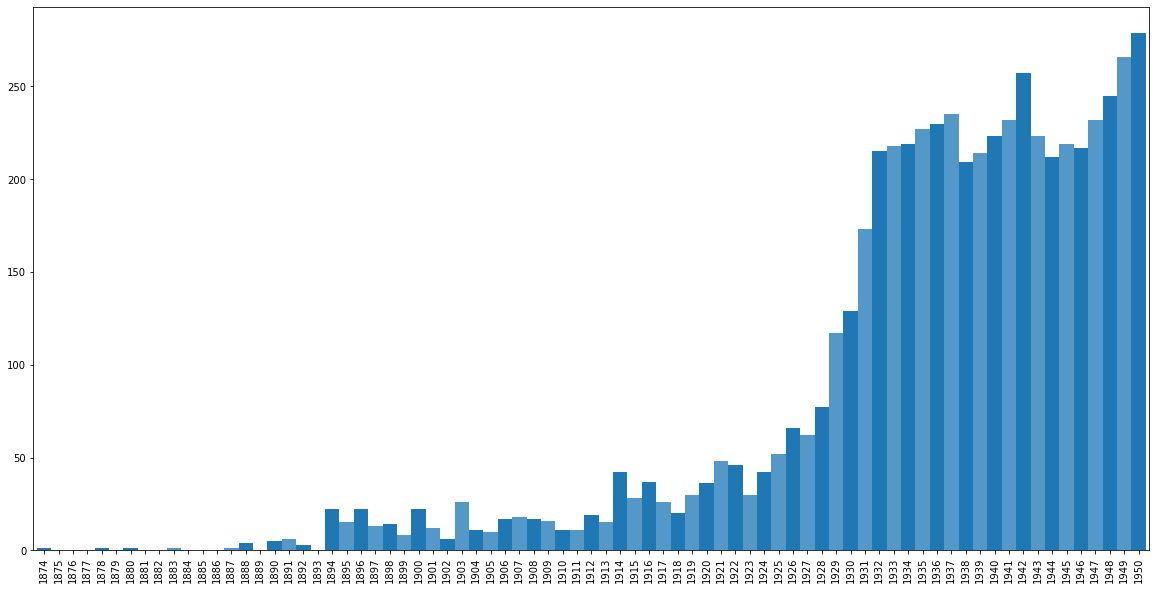

In [23]:
movies_per_year['number_movies'].plot(kind='bar', width=1, figsize=(20,10), color=['#1F77B4', '#5398C6'])

<br>

Average rating of all movies:

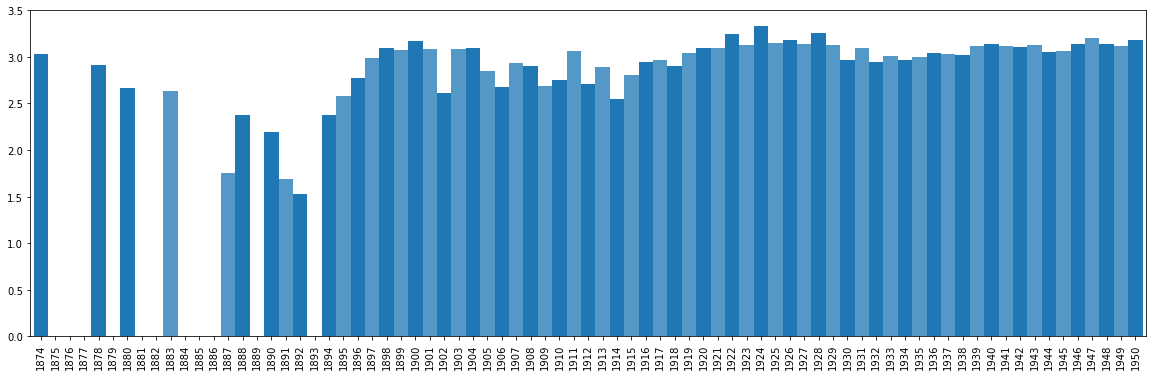

In [24]:
movies_per_year['av_rating_per_year'].plot(kind='bar', width=1, figsize=(20,6), color=['#1F77B4', '#5398C6'])

<br>

Average popularity of movies:<br>
(*total number of ratings* / *number of movies*):

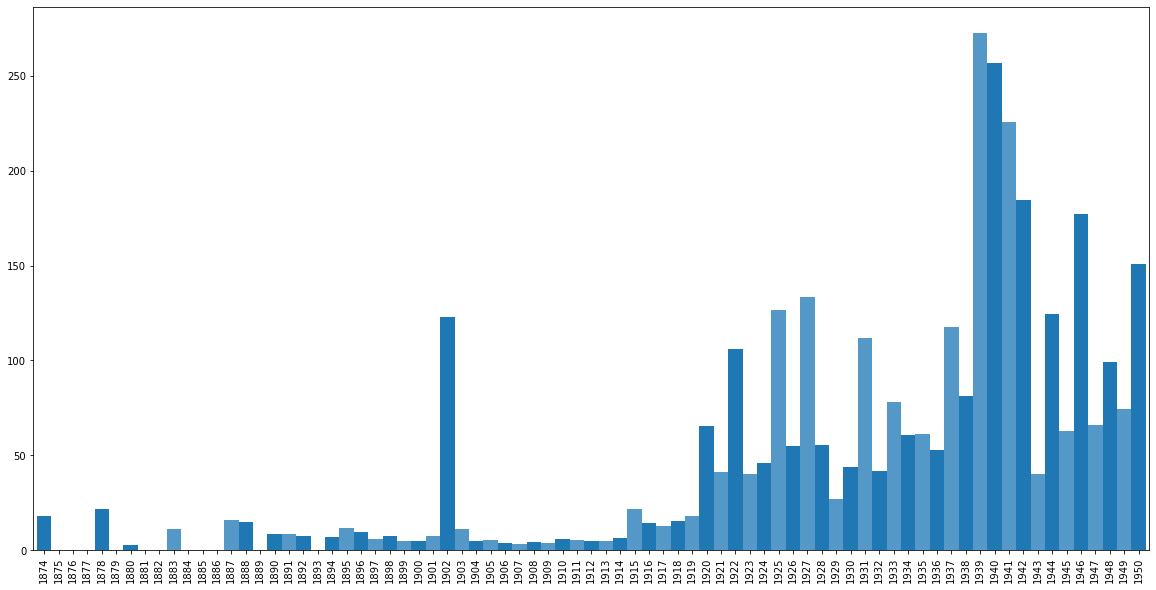

In [25]:
movies_per_year['av_popularity'].plot(kind='bar', width=1, figsize=(20,10), color=['#1F77B4', '#5398C6'])

#### <br>
<br>

#### Goal 2: Genres of movies during the period

In [26]:
mvs_expanded = pd.concat([mvs['title'],
                        mvs['year'],
                        mvs['genres'].str.split('|', expand=True)
                       ], axis=1)

mvs_expanded.head()

,title,year,0,1,2,3,4,5,6
movieId,,,,,,,,,
148054,Passage de Venus (1874),1874,Documentary,None,None,None,None,None,None
148048,Sallie Gardner at a Gallop (1878),1878,(no genres listed),None,None,None,None,None,None
202045,Athlete Swinging a Pick (1880),1880,Documentary,None,None,None,None,None,None
166800,Buffalo Running (1883),1883,(no genres listed),None,None,None,None,None,None
148040,Man Walking Around a Corner (1887),1887,(no genres listed),None,None,None,None,None,None


<br>

Number of movies of different genres.<br>
(*At first, I separately count number of movies in each column, them summarize results in each row, then transfort type of data from float to integer. I'm sure that there's more easy way, but I don't know it.*)

In [27]:
number_genres = mvs_expanded.iloc[:, 2:].apply(pd.value_counts).sum(axis=1).astype('int')
number_genres

(no genres listed)     582
Action                 288
Adventure              359
Animation              448
Children               166
Comedy                1741
Crime                  614
Documentary            149
Drama                 2422
Fantasy                228
Film-Noir              203
Horror                 212
Musical                272
Mystery                429
Romance               1292
Sci-Fi                  91
Thriller               356
War                    313
Western                310
dtype: int64

<br>

Number of movies per genres:

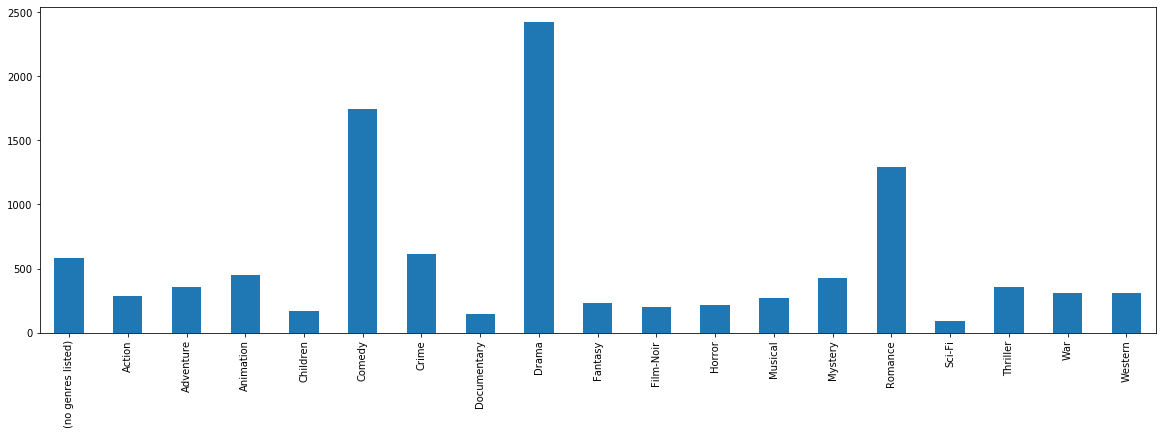

In [28]:
number_genres.plot(kind='bar', figsize=(20, 6))

<br>
<br>

#### Goal 3: Movies of definite genre per year

In [29]:
gnr = 'Documentary'

Select movies that contain defined genre in the column 'genres'

In [30]:
mvs_of_genre = mvs[mvs['genres'].str.contains(gnr)]

mvs_of_genre.head()

,title,genres,year,av_rating,number_of_ratings
movieId,,,,,
148054,Passage de Venus (1874),Documentary,1874,3.027778,18
202045,Athlete Swinging a Pick (1880),Documentary,1880,2.666667,3
148042,Accordion Player (1888),Documentary,1888,1.928571,14
176849,Roundhay Garden Scene (1888),Documentary,1888,2.605263,19
148050,Traffic Crossing Leeds Bridge (1888),Documentary,1888,2.375000,20


<br>

Count number of movies with defined genre per year:

In [31]:
number_mvs_of_genre = mvs_of_genre.groupby('year').size()

number_mvs_of_genre.head()

year
1874     1
1880     1
1888     4
1891     4
1894    14
dtype: int64

<br>

Years of the oldest and latest movies of defined genre:

In [32]:
year_genre_oldest = number_mvs_of_genre.index.min()
year_genre_latest = number_mvs_of_genre.index.max()

year_genre_oldest, year_genre_latest

(1874, 1950)

<br>

Handle details of the Series:
* Fill in years without data with NaN values
* Replace NaN by 0
* Transform type from float to int

In [33]:
number_mvs_of_genre = pd.Series(number_mvs_of_genre, index=range(year_genre_oldest, year_genre_latest+1))
number_mvs_of_genre.fillna(0, inplace=True)
number_mvs_of_genre = number_mvs_of_genre.astype('int')

number_mvs_of_genre.head()

1874    1
1875    0
1876    0
1877    0
1878    0
dtype: int64

Total number of movies of defined genre in defined perios:

In [34]:
number_mvs_of_genre.sum()

149

<br>

Number of movies of defined genre per year:

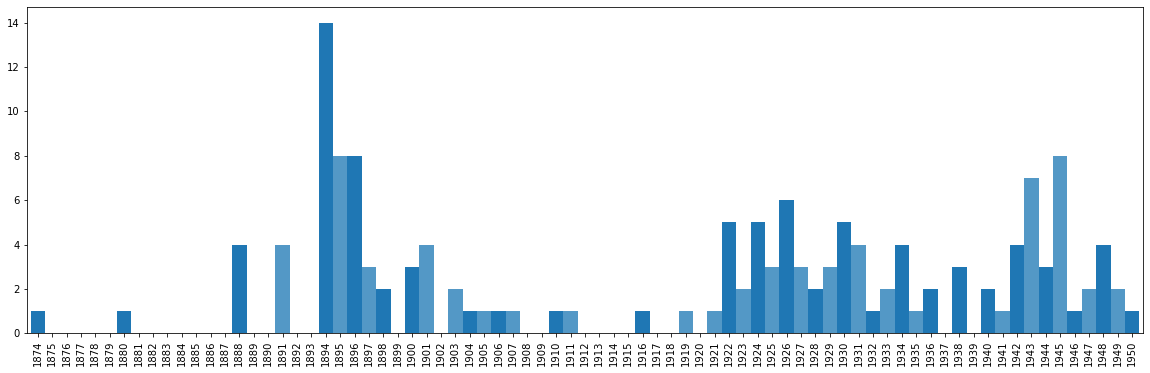

In [35]:
number_mvs_of_genre.plot(kind='bar', width=1, figsize=(20,6), color=['#1F77B4', '#5398C6'])

<br>

<br>
<br>

#### Goal 4: Combination of defined genre with other genres

Select movies with defined genre. For that we use already created  DataFrame 'mvs_with_gnr'.<br>
(*Using 'mvs_of_genre' would be simpler way, but boring in terms of programming.*)

In [36]:
mvs_with_gnr = mvs_expanded[(mvs_expanded.iloc[:, 2:] == gnr).any(axis=1)]

assert len(mvs_with_gnr) == number_mvs_of_genre.sum(), 'something wrong with number of movies'

mvs_with_gnr.head()

,title,year,0,1,2,3,4,5,6
movieId,,,,,,,,,
148054,Passage de Venus (1874),1874,Documentary,None,None,None,None,None,None
202045,Athlete Swinging a Pick (1880),1880,Documentary,None,None,None,None,None,None
148042,Accordion Player (1888),1888,Documentary,None,None,None,None,None,None
176849,Roundhay Garden Scene (1888),1888,Documentary,None,None,None,None,None,None
148050,Traffic Crossing Leeds Bridge (1888),1888,Documentary,None,None,None,None,None,None


<br>

Count number of adjacent genres. Delete from resulted Series initial genre.

In [37]:
number_adjacent_genres = mvs_with_gnr.iloc[:, 2:].apply(pd.value_counts).sum(axis=1).astype('int')

number_adjacent_genres.drop(gnr, inplace=True)
#alternative: del number_adjacent_genres[gnr]

number_adjacent_genres

Action        2
Adventure     3
Animation     3
Comedy        4
Drama        12
Horror        1
Romance       1
Thriller      1
War          14
dtype: int64

<br>

Number of adjacent genres:

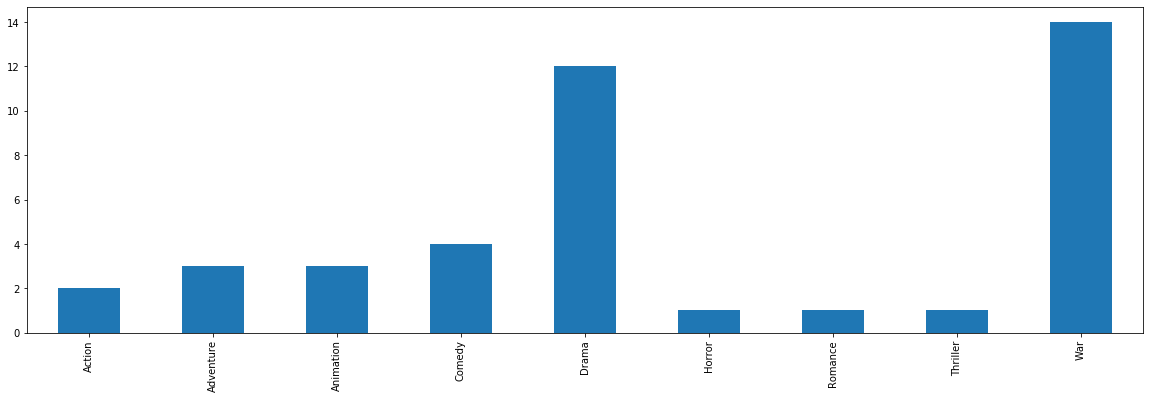

In [38]:
number_adjacent_genres.plot(kind='bar', figsize=(20,6))

<br>

Number of movies without adjacent genres:<br>
(*I use trick that in such case the second column of genre contains 'None'*)

In [39]:
len(mvs_with_gnr[mvs_with_gnr[1].isnull()])

112